# RO NLP by Word2Vec
### (`19. 5. 29. 현재 )

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from ckonlpy.tag import Twitter #konlpy twitter는 add_dictionary가 없어서, ckonlpy(customized konlpy) 사용.
twitter = Twitter()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


# ⑴ 자료 읽어오기

In [3]:
df2 = pd.read_csv('new_data_8529.csv', sep='\t', encoding='UTF-8')

In [4]:
df = df2.loc[df2['대상 선정']=='O',:] # 대상 선정값이 O 인 것만 가져오기 (X제외)

In [5]:
df = df.reindex()

In [6]:
df.columns

Index(['std_clm_type_cd', 'ro_y', 'clm_jgmt_dt', 'ceq_caus_cd', 'ceq_psit_cd',
       'ceq_psit_nm', 'trim_plnt_cd', 'prj_vehl_cd', 'mdl_cd', 'part_sys_cd',
       'repn_part_cd', 'clm_prtl_sbc', '대상 선정', '구분', '책임구', '원인', '검토결과'],
      dtype='object')

In [7]:
df.head(3)

std_clm_type_cd  ro_y  clm_jgmt_dt ceq_caus_cd ceq_psit_cd    ceq_psit_nm  \
12               W  2017     20171010         ZZ7         B11  조립 문제_미장착/오장착   
14               W  2018     20180725         ZZ7         B11  조립 문제_미장착/오장착   
15               W  2015     20151114         ZZ3         B11  조립 문제_미장착/오장착   

   trim_plnt_cd prj_vehl_cd mdl_cd part_sys_cd repn_part_cd  \
12         KV11          CK     J5          AC        91500   
14         KV11          YP     A9          EE        28291   
15         KV11          YP     A9          TT        81750   

                                         clm_prtl_sbc 대상 선정       구분   책임구  \
12  [C] 현상-1. 현상  가. 인도후 오디오 작동시 주파수 및 노이즈 발생으로 고객...     O  기능(커넥터)  생산공장   
14  [C] 1. 현상  주행중 엔진경고등 점등2. 점검내용 및 원인  스캔점검결과 P2...     O  기능(커넥터)  생산공장   
15  [C] 차량 테일게이트트림에서 뜨르르르 이상소음발생으로 테일게이트트림 탈착하여 확인...     O   실내부품이음  생산공장   

     원인                검토결과  
12  미결선  O-기능(커넥터)-생산공장-미결선  
14   기타   O-기능(커넥터)-생산공장-기타  
15   이물    O-실내부품이음-생산공장-이물

In [8]:
df.shape

(3012, 17)

# ⑵ 자료분류현황

In [9]:
category_count = df['대상 선정'].value_counts()
category_count

O    3012
Name: 대상 선정, dtype: int64

In [10]:
category_count = df['구분'].value_counts()
category_count

기능(커넥터)    1601
실내부품이음     1050
하체이음        361
Name: 구분, dtype: int64

In [11]:
category_count = df['책임구'].value_counts()
category_count

구매      2274
생산공장     724
연구소       14
Name: 책임구, dtype: int64

In [12]:
category_count = df['원인'].value_counts()
category_count

부품       2274
조립불량      230
결선불량      225
체결불량      103
기타        100
미결선        37
이종/간섭      21
설계/구조      14
이물          8
Name: 원인, dtype: int64

# ⑶ null값 확인 및 처리하기

In [13]:
# 제거
# df = df[df['대상 선정'].notnull()].copy()
# 다른값으로 채우기
df = df.fillna('N')

In [14]:
df = df.reindex()

In [15]:
df.shape

(3012, 17)

In [16]:
category_count = df['대상 선정'].value_counts()
category_count

O    3012
Name: 대상 선정, dtype: int64

In [17]:
category_count = df['구분'].value_counts()
category_count

기능(커넥터)    1601
실내부품이음     1050
하체이음        361
Name: 구분, dtype: int64

In [18]:
category_count = df['책임구'].value_counts()
category_count

구매      2274
생산공장     724
연구소       14
Name: 책임구, dtype: int64

In [19]:
category_count = df['원인'].value_counts()
category_count

부품       2274
조립불량      230
결선불량      225
체결불량      103
기타        100
미결선        37
이종/간섭      21
설계/구조      14
이물          8
Name: 원인, dtype: int64

In [20]:
df[df['구분'].isnull()]

Empty DataFrame
Columns: [std_clm_type_cd, ro_y, clm_jgmt_dt, ceq_caus_cd, ceq_psit_cd, ceq_psit_nm, trim_plnt_cd, prj_vehl_cd, mdl_cd, part_sys_cd, repn_part_cd, clm_prtl_sbc, 대상 선정, 구분, 책임구, 원인, 검토결과]
Index: []

In [21]:
df[df['원인'].isnull()]

Empty DataFrame
Columns: [std_clm_type_cd, ro_y, clm_jgmt_dt, ceq_caus_cd, ceq_psit_cd, ceq_psit_nm, trim_plnt_cd, prj_vehl_cd, mdl_cd, part_sys_cd, repn_part_cd, clm_prtl_sbc, 대상 선정, 구분, 책임구, 원인, 검토결과]
Index: []

In [22]:
df[df['책임구'].isnull()]

Empty DataFrame
Columns: [std_clm_type_cd, ro_y, clm_jgmt_dt, ceq_caus_cd, ceq_psit_cd, ceq_psit_nm, trim_plnt_cd, prj_vehl_cd, mdl_cd, part_sys_cd, repn_part_cd, clm_prtl_sbc, 대상 선정, 구분, 책임구, 원인, 검토결과]
Index: []

In [23]:
df.shape

(3012, 17)

# ⑷ 단어 전처리

In [24]:
# 예측값과 실제값 비교를 위해 컬럼을 하나 더 생성합니다.
# df['result_pred'] = df['검토결과'].astype(str).copy()
# df['target_pred'] = df['대상 선정'].astype(str).copy()
# df['charge_pred'] = df['책임구'].astype(str).copy()
df['division_pred'] = df['구분'].astype(str).copy()

In [25]:
df['division_pred'].head()

12    기능(커넥터)
14    기능(커넥터)
15     실내부품이음
19    기능(커넥터)
24    기능(커넥터)
Name: division_pred, dtype: object

### (ㄱ) 오타, 동의어 처리(replace)

In [26]:
# df['clm_prtl_sbc'].isin(['가니시'])

In [27]:
userdic = pd.read_csv('usedic2.csv', sep='\t', encoding='UTF-8')
userdic['User Dic.'][0:1]
userdic = userdic.rename(columns = {'User Dic.':'standard'})
userdic = userdic.rename(columns = {'동의어':'missprint'})
userdic = userdic.rename(columns = {'불용단어':'stops'})
userdic_list = userdic.rename(columns = {'User Dic.':'standard'})
userdic_list = userdic.rename(columns = {'동의어':'missprint'})
userdic_list = userdic.rename(columns = {'불용단어':'stops'})
userdic_list = userdic_list.fillna('')
userdic = userdic.fillna('')

In [28]:
userdic_list[:5]

stops standard missprint
0    (LH)      가니쉬       가니시
1    (RH)      가벼움          
2  (사진첨부)       가스        개스
3     (우)       가죽          
4     (좌)       간격        간극

In [29]:
userdic[:5]

stops standard missprint
0    (LH)      가니쉬       가니시
1    (RH)      가벼움          
2  (사진첨부)       가스        개스
3     (우)       가죽          
4     (좌)       간격        간극

In [30]:
userdic.shape

(1184, 3)

In [31]:
replace_word = userdic.iloc[:,1:3]
replace_word = replace_word[replace_word.missprint != '']
replace_word.head()

standard missprint
0      가니쉬       가니시
2       가스        개스
4       간격        간극
5       간격         갭
6    간격 단차       간단차

In [32]:
replace_word.shape

(474, 2)

In [33]:
df['clm_prtl_sbc'].iloc[488]

'[C] 1.현상  220V 인버터 작동 불량  ECM룸미러 작동 불량  VDC OFF 스위치 작동 불량  히터컨트롤 작동 AVN 화면 표시불량2.점검  현상 확인시 상기 현상 지속되며 히터 컨트롤 조작시 AVN 화면이 약 0.2초 가량만 표시됨3.점검내용 및 원인  배선 점검시 ECM R39커넥터 10번단자 전원인가 불량확인함  VDC OFF 스위치 및 인버터 스위치 M11 커넥터 10번단자 전원인가 불량확인함  히터 컨트롤 M08-B 커넥터 7번 전원인가 불량 확인함  실내 정션박스 휴즈 모듈4 7.5A 정상 및 핀정상 확인  메인 배선 점검 위해 배선 일부 이격 실시 및 히터 컨트롤 및 AVN헤드 유닛등 탈착 실시함  JM01 커넥터 16~23번 단자 전원 인가 불량 확인함  IP-G 9번 단자와 JM01 18번 단자간의 도통 점검시 정상임 핀 점검시 IP-G 9번 헐거움  해당 단자 교환 및 정상 조립후 상기현상 해소됨3.조치내용  배선 점검 및 수정 실시함'

In [34]:
replaceword_list =  replace_word['standard'].tolist()
missword_list = replace_word['missprint'].tolist()
print(len(replaceword_list))
print(len(missword_list))

474
474


In [35]:
for i in range(len(replaceword_list)):
    df['clm_prtl_sbc'] = df['clm_prtl_sbc'].replace(missword_list[i],replaceword_list[i],regex=True)
#regex=True 설정을 주면 조사가 붙어있던 말던 단어를 다 바꿔준다.

In [36]:
# df[df['clm_prtl_sbc'].isin(['간극','가니시'])] # 오타'간극','가니시'가 검색되는지 확인

### (ㄴ) 사용자 단어정의

In [37]:
standard_word = userdic.iloc[:,1:2]
standard_word.head()

standard
0      가니쉬
1      가벼움
2       가스
3       가죽
4       간격

In [38]:
udw_list =  standard_word['standard'].tolist() # 단어들만 list로 추출.

In [39]:
for word in udw_list: 
    twitter.add_dictionary(word, 'Noun') # for문을 통해 dictionary에 단어들을 Noun으로 추가.

In [40]:
twitter.pos(df['clm_prtl_sbc'].iloc[1]) # '리어', '미장착'이 Noun으로 잘 정의되었는지 확인.

[('[', 'Punctuation'),
 ('C', 'Alpha'),
 (']', 'Punctuation'),
 ('1', 'Number'),
 ('.', 'Punctuation'),
 ('현상', 'Noun'),
 ('주행', 'Noun'),
 ('중', 'Noun'),
 ('엔진', 'Noun'),
 ('경고등', 'Noun'),
 ('점등', 'Noun'),
 ('2', 'Number'),
 ('.', 'Punctuation'),
 ('점검', 'Noun'),
 ('내용', 'Noun'),
 ('및', 'Noun'),
 ('원인', 'Noun'),
 ('스캔', 'Noun'),
 ('점검', 'Noun'),
 ('결과', 'Noun'),
 ('P', 'Alpha'),
 ('200300', 'Number'),
 ('DPF', 'Alpha'),
 ('효율', 'Noun'),
 ('저하', 'Noun'),
 ('발생', 'Noun'),
 ('됨', 'Verb'),
 ('(', 'Punctuation'),
 ('임시', 'Noun'),
 ('코드', 'Noun'),
 (')', 'Punctuation'),
 ('주행', 'Noun'),
 ('점검', 'Noun'),
 ('결과', 'Noun'),
 ('경고등', 'Noun'),
 ('점등', 'Noun'),
 ('됨', 'Verb'),
 ('3', 'Number'),
 ('.', 'Punctuation'),
 ('조치', 'Noun'),
 ('내용', 'Noun'),
 ('DPF', 'Alpha'),
 ('및', 'Noun'),
 ('차압', 'Noun'),
 ('센서', 'Noun'),
 ('교환', 'Noun'),
 ('후', 'Noun'),
 ('시운전', 'Noun'),
 ('결과', 'Noun'),
 ('정상', 'Noun'),
 ('스로틀', 'Noun'),
 ('플랩', 'Noun'),
 ('쪽', 'Noun'),
 ('호스', 'Noun'),
 ('미장착', 'Noun'),
 ('되어', 'Ver

### (ㄷ) 트위터 불용어 제거 및 명사추출

### 1. 불용어 제거

In [41]:
# user dictionary 등록
twitter.add_dictionary(['가니쉬','가스','가죽','간격','간격 단차','간섭','간헐적','감지 센서','개선품','개조','개폐','견인',
                       '경고등','경보음','고객','고장코드','고정','공기압','과다','구멍','그로멧','그리스','글라스','글라스런',
                       '글로브박스','기어','기준','꺾임','나사산','내부','내장재','냉각수','냉간','너트','네비게이션','노브',
                       '노즐','누기','누수','누유','누출','다이얼','단선','단자','단차','단품','닫힘','답력','대쉬','덕트',
                       '데이라이트','데코레이션','도색','도어','도어락','뒤','드레인','들뜸','떨림','떨어짐','라디에이터',
                       '라벨','라이닝','라이선스','라이선스 플레이트','락','란스','램프','랫치','러기지','런찬넬','레귤레이터',
                       '레그','레그타','레버','레벨','레벨링','레인지','레인프','레일','로워암','로컬','롤러','롤러암','루프',
                       '루프랙','룸램프','리모컨','리모트','리어','리어뷰','리저버','리클라이너','리턴','리테이너','리프터',
                       '리프팅','리플렉터','릴레이','릴리즈','링키지','마모','마운팅','마킹','매니폴드','매트','머드가드',
                       '머플러','멀티펑션','멈춤','멤버','모니터','모듈','모터','몰딩','무거움','무드','미결선','미러','미작동',
                       '미장착','미조립','미체결','바디','박음부','배터리','백워닝','백판넬','밸런스','밸브','버클','버튼',
                       '범퍼','베어링','베젤','벤틸레이션','벨트','벨트라인','변속','볼트','부밍음','부조','불규칙','불량',
                       '브라켓','브레이크','블랭킹','블레이드','블로우','블루','블루투스','블루핸즈','비상등','비포장','사이',
                       '사이드','사이드멤버','사제','삼각대','상승','상승 하강','생산','섀시','선글라스','선루프','선바이져',
                       '선쉐이드','세이프티','세차','센서','센터','소손','소켓','속도','송풍','송풍구','쇼버','쇽업','수동',
                       '쉘프','쉬라우드','쉬프트','스마트','스마트키','스위치','스캔','스커프','스크래치','스키드','스트라이커',
                       '스트러트','스티어링','스티어링휠','스포일러','스피커','슬라이딩','시거잭','시동꺼짐','시뮬레이션','시운전',
                       '시트','시트백','시트벨트','실내등','실러','실런트','쏠림','씰링','아울렛','아웃','아웃사이드',
                       '아웃사이드 미러','아이들','악셀','안개등','안테나','안티','암레스트','앞','액츄에이터','액티브',
                       '어라운드뷰','어셈블리','어스','어시스트','언더','언락','언폴딩','얼라인먼트','없음','에어백','에어벤트',
                       '에어컨','에이밍','엔진','엔진룸','엠블럼','여닫음','연동','연료','열림','열선','오버슬램','오버슬램범퍼',
                       '오버헤드','오장착','오체결','오결선','오토','오토큐','오토크루즈','와셔','와이어링','와이퍼','완체결',
                       '외부','요소수','요철','우','운전석','워셔액','원인품','웨더스트립','윈드실드','유닛','유막','유보',
                       '이격','이모빌라이져','이물질','이상','이음','이종품','익스텐션','인도','인버터','인사이드','인사이드 미러',
                       '인슐레이션','인스트','인젝터','인터쿨러','있음','자동','작동','작동 불량','작동력','작동음','잠금',
                       '장착','장치','재발','재부팅','재시동','재이탈','재장착','재조립','재체결','저항','전압','점검','점등',
                       '점멸','정렬','정션','정위치','정차','정체결','제동','제어','조명','조수석','조인트','조작감','조향각',
                       '좌','주름','주차','주행','진공','찬넬','천장','체결','체인지','체커','체크','쳐짐','충격','충전량',
                       '치핑','카울','카페트','캘리퍼','캠버','캡','커넥터','커버','커버링','커튼','커플러','컨트롤','컬럼',
                       '컴프레셔','컴플리트','컵홀더','케이블','코니시티','코드표','콘센트','콘솔','콘티넨탈','콤비','콤비램프',
                       '쿠션','쿨링팬','쿼터','퀵커넥터','크랙','크러쉬','크러쉬패드','크루즈','클램프','클러스터','클럭스프링',
                       '클리너','클립','타이어','탈거','탈부착','태핑스크류','터미널','턴램프','테스트','테이핑','테일게이트',
                       '텐션','토출','토크','통신','트라이앵글홀더','트랜스버스','트랜지스터','트렁크','트레이','트림','틀어짐',
                       '파워','파이프','파킹','파팅','판넬','패드','패들','패스너','패키지트레이','퍼스널','페달','페인트','펜더',
                       '펴짐','평탄로','포그램프','폴딩','풀리','풀핸들','풍절음','퓨즈','프런트','프레임','프로텍터','플랜지',
                       '플러그','플레이트','플로워','피더','픽싱','핀','필러','필러넥','필름','하강','하네스','하드웨어','하우징',
                       '하이드로릭','하이패스','해제','핸들','헤드라이닝','헤드라이트','헤드램프','헤드레스트','헤드업디스플레이',
                       '현상','협력사','호스','혼','홀더','확인','회로','회수량','후드','휘어짐','휠가드','휨','히터','힌지',
                       '엔진룸'],'Noun')

In [42]:
def preprocessing(text):
    # 개행문자 제거
    text= str(text)
    text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    #text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    #text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    return text

In [43]:
#%time
df['clm_prtl_sbc'] = df['clm_prtl_sbc'].apply(preprocessing)

In [44]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['현상', '[C]','현상및점검','현    상','현 상','점검점검','점검내용','조치내용','점검점검내용','현상및조치','C','원인',
             '점검/원인','사진첨부','(사진첨부)','사진참조','점검및원인','동영상참조','동영상','대리점','고객','고객에게','상기',
             '차량','상기차량은','자동차','당차량은','당차량','당','차량은','점검및조치내용','F/LH','F/RH','L/H','R/H','L/H리어',
             'R/H리어','LH/RH','LH','RH','(RH)','(LH)','R/LH','R/RH','리어RH','리어LH','LH쪽','RH쪽','Rr','RR','FRT','Frt',
             'frt','rr','C-10000','C-100','(좌)','(우)','A/S','결과','공임','광주','넥쏘','니로','레이','렌트','리무진',
             '모닝','모하비','벨로스터','사진','상기','서비스','소하','스타렉스','스팅어','스포티지','신차','싼타페','써비스',
             '쏘나타','쏘렌토','쏘울','아반떼','아산','아이오닉','언덕','엑센트','열','울산','임시 넘버','임시 번호','입고',
             '저머검내용','점검결과','조치결과','주차장','증상','지하','철도','첨부','첨부파일','청구','출고','카 마스터','카니발',
             '카렌스','코나','클레임','투싼','팰리세이드','하이리무진','하이브리드','현     상','현    상','현   상','현  상',
             '현 상','현산','화성','그랜저','새벽','새차','야간','주간','그랜져','주재원','아침','밤, 심야','낮,낫','주제원']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words) #stops에 안 걸리는 나머지 것들 이어붙이기

In [45]:
#%time 
df['clm_prtl_sbc'] = df['clm_prtl_sbc'].apply(remove_stopwords)

### 2. 명사추출

In [46]:
def nouns(text):
    text = str(text)
    text = twitter.nouns(text)
    return text

In [47]:
df['clm_prtl_sbc'] = df['clm_prtl_sbc'].apply(nouns)

In [48]:
df.head(2)

std_clm_type_cd  ro_y  clm_jgmt_dt ceq_caus_cd ceq_psit_cd    ceq_psit_nm  \
12               W  2017     20171010         ZZ7         B11  조립 문제_미장착/오장착   
14               W  2018     20180725         ZZ7         B11  조립 문제_미장착/오장착   

   trim_plnt_cd prj_vehl_cd mdl_cd part_sys_cd repn_part_cd  \
12         KV11          CK     J5          AC        91500   
14         KV11          YP     A9          EE        28291   

                                         clm_prtl_sbc 대상 선정       구분   책임구  \
12  [인도, 후, 오디오, 작동, 시, 주파수, 및, 이음, 발, 생으로, 불량, 제기...     O  기능(커넥터)  생산공장   
14  [주행, 중, 엔진, 경고등, 점등, 및, 스캔, 점검, 결과, 효율, 저하, 발생...     O  기능(커넥터)  생산공장   

     원인                검토결과 division_pred  
12  미결선  O-기능(커넥터)-생산공장-미결선       기능(커넥터)  
14   기타   O-기능(커넥터)-생산공장-기타       기능(커넥터)

In [49]:
df.iloc[1,11]

['주행',
 '중',
 '엔진',
 '경고등',
 '점등',
 '및',
 '스캔',
 '점검',
 '결과',
 '효율',
 '저하',
 '발생',
 '임시',
 '코드',
 '주행',
 '점검',
 '결과',
 '경고등',
 '점등',
 '및',
 '차압',
 '센서',
 '교환',
 '후',
 '시운전',
 '정상',
 '스로틀',
 '플랩',
 '쪽',
 '호스',
 '미장착',
 '출고']

In [50]:
type(df.iloc[1,11])

list

# (5) Word3Vec 모델학습

In [51]:
# word2vec 모델 학습에 로그를 찍을 수 있도록 합니다.
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

In [52]:
# 초기화 및 모델 학습
from gensim.models import word2vec
# 모델 학습
model = word2vec.Word2Vec(df['clm_prtl_sbc'], size=100, window=2, min_count=1, iter=100, sg=1)
model

2019-05-29 14:26:33,711 : INFO : 'pattern' package not found; tag filters are not available for English
2019-05-29 14:26:33,724 : INFO : collecting all words and their counts
2019-05-29 14:26:33,725 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-29 14:26:33,743 : INFO : collected 3934 word types from a corpus of 94287 raw words and 3012 sentences
2019-05-29 14:26:33,744 : INFO : Loading a fresh vocabulary
2019-05-29 14:26:33,752 : INFO : effective_min_count=1 retains 3934 unique words (100% of original 3934, drops 0)
2019-05-29 14:26:33,753 : INFO : effective_min_count=1 leaves 94287 word corpus (100% of original 94287, drops 0)
2019-05-29 14:26:33,770 : INFO : deleting the raw counts dictionary of 3934 items
2019-05-29 14:26:33,773 : INFO : sample=0.001 downsamples 64 most-common words
2019-05-29 14:26:33,774 : INFO : downsampling leaves estimated 63525 word corpus (67.4% of prior 94287)
2019-05-29 14:26:33,785 : INFO : estimated required memory for

2019-05-29 14:26:35,674 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-29 14:26:35,679 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-29 14:26:35,680 : INFO : EPOCH - 18 : training on 94287 raw words (63612 effective words) took 0.1s, 651376 effective words/s
2019-05-29 14:26:35,769 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-29 14:26:35,773 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-29 14:26:35,775 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-29 14:26:35,777 : INFO : EPOCH - 19 : training on 94287 raw words (63668 effective words) took 0.1s, 699454 effective words/s
2019-05-29 14:26:35,868 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-29 14:26:35,871 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-29 14:26:35,880 : INFO : worker thread finished; awaiting finish of 0 more threads
2019

2019-05-29 14:26:37,679 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-29 14:26:37,680 : INFO : EPOCH - 38 : training on 94287 raw words (63573 effective words) took 0.1s, 562668 effective words/s
2019-05-29 14:26:37,779 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-29 14:26:37,786 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-29 14:26:37,794 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-29 14:26:37,795 : INFO : EPOCH - 39 : training on 94287 raw words (63472 effective words) took 0.1s, 623128 effective words/s
2019-05-29 14:26:37,886 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-29 14:26:37,890 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-29 14:26:37,891 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-29 14:26:37,891 : INFO : EPOCH - 40 : training on 94287 raw words (63525 effective word

2019-05-29 14:26:39,600 : INFO : EPOCH - 58 : training on 94287 raw words (63552 effective words) took 0.1s, 738437 effective words/s
2019-05-29 14:26:39,686 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-29 14:26:39,688 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-29 14:26:39,693 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-29 14:26:39,695 : INFO : EPOCH - 59 : training on 94287 raw words (63622 effective words) took 0.1s, 711136 effective words/s
2019-05-29 14:26:39,796 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-29 14:26:39,798 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-29 14:26:39,800 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-29 14:26:39,801 : INFO : EPOCH - 60 : training on 94287 raw words (63632 effective words) took 0.1s, 634505 effective words/s
2019-05-29 14:26:39,887 : INFO : worker thread finis

2019-05-29 14:26:41,743 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-29 14:26:41,746 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-29 14:26:41,749 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-29 14:26:41,750 : INFO : EPOCH - 79 : training on 94287 raw words (63712 effective words) took 0.1s, 619725 effective words/s
2019-05-29 14:26:41,832 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-29 14:26:41,836 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-29 14:26:41,839 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-29 14:26:41,840 : INFO : EPOCH - 80 : training on 94287 raw words (63530 effective words) took 0.1s, 748513 effective words/s
2019-05-29 14:26:41,927 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-29 14:26:41,928 : INFO : worker thread finished; awaiting finish of 1 more threads
2019

2019-05-29 14:26:43,622 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-29 14:26:43,624 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-29 14:26:43,624 : INFO : EPOCH - 99 : training on 94287 raw words (63495 effective words) took 0.1s, 742309 effective words/s
2019-05-29 14:26:43,713 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-29 14:26:43,715 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-29 14:26:43,717 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-29 14:26:43,718 : INFO : EPOCH - 100 : training on 94287 raw words (63498 effective words) took 0.1s, 718350 effective words/s
2019-05-29 14:26:43,719 : INFO : training on a 9428700 raw words (6352783 effective words) took 9.9s, 643639 effective words/s


In [53]:
# 모델 이름을 지정하고 저장한다.
model_name = '1minwords'
model.save(model_name)

2019-05-29 14:26:43,726 : INFO : saving Word2Vec object under 1minwords, separately None
2019-05-29 14:26:43,727 : INFO : not storing attribute vectors_norm
2019-05-29 14:26:43,728 : INFO : not storing attribute cum_table
2019-05-29 14:26:43,729 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-29 14:26:43,770 : INFO : saved 1minwords


In [54]:
# 단어 사전 수
len(model.wv.vocab)

3934

In [55]:
# 단어 사전에서 상위 10개만 보기
vocab = model.wv.vocab
sorted(vocab, key=vocab.get, reverse=True)[:30]

['이음',
 '점검',
 '시',
 '발생',
 '교환',
 '후',
 '불량',
 '및',
 '확인',
 '함',
 '작동',
 '경고등',
 '조치',
 '점등',
 '주행',
 '센서',
 '정상',
 '중',
 '시운전',
 '글라스',
 '도어',
 '이상',
 '리어',
 '배선',
 '커넥터',
 '스위치',
 '운전석',
 '출고',
 '생으로',
 '프런트']

In [56]:
type(vocab)

dict

In [57]:
# Counter로 자주 등장하는 단어 보기
from collections import Counter
dict(Counter(vocab).most_common(20))

{'이음': <gensim.models.keyedvectors.Vocab at 0x342e5320>,
 '점검': <gensim.models.keyedvectors.Vocab at 0x34503828>,
 '시': <gensim.models.keyedvectors.Vocab at 0x2d1f7a58>,
 '발생': <gensim.models.keyedvectors.Vocab at 0x34503eb8>,
 '교환': <gensim.models.keyedvectors.Vocab at 0x34503fd0>,
 '후': <gensim.models.keyedvectors.Vocab at 0x2d1f7a20>,
 '불량': <gensim.models.keyedvectors.Vocab at 0x345037b8>,
 '및': <gensim.models.keyedvectors.Vocab at 0x342e52e8>,
 '확인': <gensim.models.keyedvectors.Vocab at 0x34503908>,
 '함': <gensim.models.keyedvectors.Vocab at 0x3450d390>,
 '작동': <gensim.models.keyedvectors.Vocab at 0x2d1f7c18>,
 '경고등': <gensim.models.keyedvectors.Vocab at 0x34503d68>,
 '조치': <gensim.models.keyedvectors.Vocab at 0x34511668>,
 '점등': <gensim.models.keyedvectors.Vocab at 0x34503da0>,
 '주행': <gensim.models.keyedvectors.Vocab at 0x34503cc0>,
 '센서': <gensim.models.keyedvectors.Vocab at 0x34503f98>,
 '정상': <gensim.models.keyedvectors.Vocab at 0x34503a90>,
 '중': <gensim.models.keyedvectors.

In [58]:
# 가장 적게 등장하는 단어
min(vocab, key=vocab.get)

'배션'

In [59]:
model.wv['간격']

array([-6.8599164e-01,  4.6128277e-02, -1.0739040e+00, -6.0647088e-01,
        1.0826877e+00, -2.5939593e-01, -9.2219836e-01,  7.9694307e-01,
        8.5871422e-01,  2.4595492e-02,  1.1091469e-01, -2.2566271e-01,
       -6.5718722e-01,  5.3547169e-03, -5.4958034e-01,  5.9870577e-01,
       -2.0776435e-03,  3.3875549e-01, -1.0055029e+00, -7.5047922e-01,
       -3.1428286e-01,  1.1202387e+00, -8.9506704e-01, -1.5747089e-02,
        6.8318373e-01, -4.6962786e-01,  8.1440037e-01,  9.5642668e-01,
       -2.8279305e-01, -3.2679343e-01, -2.5704026e-01, -1.6798386e-01,
       -6.2389478e-02, -1.8070175e-01,  4.9762208e-02, -4.1184142e-01,
        1.2849501e+00,  9.0428221e-01, -2.8436589e-01, -9.1924894e-01,
        9.5866728e-01,  4.6327528e-01, -4.7105378e-01,  1.2283221e+00,
        1.1282804e-01, -1.4319570e-01, -6.4746314e-01, -3.0453512e-01,
       -7.4552760e-02,  2.2675003e-01, -2.5350162e-01, -2.8780553e-01,
        2.3944044e-01,  1.9303781e-01, -8.3496559e-01,  4.4470134e-01,
      

In [60]:
model.wv['이음']

array([-0.16986904,  0.41728237,  0.3889924 ,  0.06369137,  0.412689  ,
        0.4304295 ,  0.01511776,  0.12936123, -0.37670654, -0.74973214,
       -0.10720284, -0.15032762, -0.3962578 , -0.02643001, -0.4284145 ,
        0.3071345 , -0.08804061,  0.0431368 , -0.36565906, -0.8055376 ,
        0.09637346,  0.20325841,  0.13317192, -0.0936975 , -0.23624314,
        0.03843131,  0.4635804 , -0.1407453 , -0.20241514,  0.07620499,
       -0.34093255, -0.00745787, -0.02273176,  0.1901521 , -0.2919115 ,
        0.26053432,  0.18595992, -0.2968885 ,  0.2753661 ,  0.22687906,
        0.5065386 , -0.37444305,  0.29630622,  0.34336206,  0.21603428,
        0.2155287 , -0.0847792 ,  0.13873112,  0.13337922,  0.319033  ,
        0.09217903,  0.14159343,  0.32037944, -0.16134857, -0.33424935,
        0.5041221 , -0.13328782,  0.27419236,  0.06327096, -0.17953356,
       -0.09303287, -0.28728807,  0.14156331, -0.23531398, -0.22866397,
       -0.34271306, -0.40764266, -0.3302197 , -0.5402472 , -0.00

In [61]:
model.wv['커넥터']

array([ 0.13157001, -0.17832704,  0.42390153, -0.32199952,  0.91308403,
       -0.09589694, -0.7613115 , -0.03798199, -0.29715684,  0.51343745,
       -0.30889213,  0.39963052,  0.06806643, -0.40179706, -0.6934589 ,
       -0.941921  ,  0.74299955, -0.18241128,  0.15523304,  0.01304777,
       -0.4148415 , -0.00615489, -0.08424051, -0.45467183, -0.3612408 ,
       -0.03826236,  0.55074275,  0.57159233,  0.03028508, -0.40579328,
        0.32131442,  0.41340467,  0.0726176 ,  0.2776933 ,  0.12587304,
        1.1183559 ,  0.19492826,  0.13469696, -0.08762379,  0.24337946,
        0.13030191,  0.53593755,  0.49480757,  0.18290627, -0.46506706,
       -0.23884729,  0.25042987,  0.23756188, -0.43287277,  0.2798235 ,
       -0.07270589, -1.0170033 ,  0.52248377, -0.04230274, -0.10458984,
       -0.64338917,  0.13814257,  0.47991234,  0.2749445 , -0.3667863 ,
       -0.21271257,  0.11608084, -0.10021347,  0.12019432, -0.7554165 ,
        0.53038913, -0.7227569 , -0.6995141 , -0.17381468, -0.17

In [62]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('현상'.split())

2019-05-29 14:26:43,874 : INFO : precomputing L2-norms of word weight vectors
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:876: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'현상'

In [100]:
# check embedding result
model.wv.most_similar(positive=['이음'], topn=50)

2019-05-29 14:29:15,089 : INFO : precomputing L2-norms of word weight vectors


[('발생', 0.6053904891014099),
 ('그르륵', 0.5756968259811401),
 ('쓰윽', 0.561272144317627),
 ('따닥', 0.5409368872642517),
 ('스윽하', 0.5371581315994263),
 ('득드륵', 0.5367867946624756),
 ('이익', 0.5342192053794861),
 ('이심', 0.530919075012207),
 ('끝단', 0.5266392230987549),
 ('뿌득', 0.5188223123550415),
 ('끅끅', 0.5188133716583252),
 ('쇳', 0.5181474089622498),
 ('그릉그릉', 0.5153661966323853),
 ('스윽', 0.5130606889724731),
 ('제자리', 0.510588526725769),
 ('푸드', 0.5098050832748413),
 ('쯤', 0.5030289888381958),
 ('띠띠띠', 0.5028802156448364),
 ('삐거덕', 0.5018155574798584),
 ('틀림', 0.5004943609237671),
 ('스킬', 0.49898940324783325),
 ('그윽', 0.4971570372581482),
 ('끄르르륵', 0.4951401948928833),
 ('그윽그윽', 0.4900045692920685),
 ('턱턱', 0.48949873447418213),
 ('시운전', 0.4893313944339752),
 ('찌', 0.4891210198402405),
 ('소은', 0.4877006411552429),
 ('윽', 0.4871509075164795),
 ('끽', 0.48704636096954346),
 ('익음', 0.48621612787246704),
 ('슬라디이딩', 0.4861699342727661),
 ('최초', 0.48537081480026245),
 ('드륵', 0.4818551540374756),
 

In [65]:
# 가장 유사한 단어를 추출
model.wv.most_similar('이음')

[('발생', 0.6053904891014099),
 ('그르륵', 0.5756968259811401),
 ('쓰윽', 0.561272144317627),
 ('따닥', 0.5409368872642517),
 ('스윽하', 0.5371581315994263),
 ('득드륵', 0.5367867946624756),
 ('이익', 0.5342192053794861),
 ('이심', 0.530919075012207),
 ('끝단', 0.5266392230987549),
 ('뿌득', 0.5188223123550415)]

In [66]:
# 가장 유사한 단어를 추출
model.wv.most_similar('하체')

[('뿌직', 0.561878502368927),
 ('엔지니어', 0.5326435565948486),
 ('사내', 0.5292518138885498),
 ('불트', 0.5291540622711182),
 ('뚜둑', 0.5267547369003296),
 ('부의', 0.49190959334373474),
 ('찌찍', 0.48994937539100647),
 ('쇳', 0.48902541399002075),
 ('조이', 0.4855104684829712),
 ('호소', 0.48038363456726074)]

In [67]:
# 가장 유사한 단어를 추출
model.wv.most_similar('하부')

[('상부', 0.46392273902893066),
 ('편', 0.4599180817604065),
 ('단기', 0.45914456248283386),
 ('끼익', 0.4555263817310333),
 ('불트', 0.4520339071750641),
 ('줄무늬', 0.45156410336494446),
 ('딸그락딸그락', 0.44689619541168213),
 ('상음', 0.4430781900882721),
 ('뿌브븍', 0.44211986660957336),
 ('롤', 0.4407668113708496)]

In [68]:
# 가장 유사한 단어를 추출
model.wv.most_similar('아래')

[('여신', 0.6676891446113586),
 ('금방', 0.6318743228912354),
 ('경이', 0.6265893578529358),
 ('셋팅시', 0.5987851619720459),
 ('엠', 0.5987482666969299),
 ('뿍', 0.595577597618103),
 ('위로', 0.5938133001327515),
 ('이신', 0.5911860466003418),
 ('알피', 0.586269199848175),
 ('룸램퍼외', 0.574959933757782)]

In [69]:
# 가장 유사한 단어를 추출
model.wv.most_similar('바닥')

[('점후', 0.6585317850112915),
 ('매트', 0.6522656083106995),
 ('구술', 0.6376458406448364),
 ('각인', 0.5949810147285461),
 ('시공', 0.5937700867652893),
 ('찌르륵', 0.585824728012085),
 ('장관', 0.570452094078064),
 ('저기', 0.5679736137390137),
 ('여기', 0.5678249597549438),
 ('자바라', 0.554893970489502)]

In [70]:
# 가장 유사한 단어를 추출
model.wv.most_similar('경고음')

[('바랭', 0.6791242361068726),
 ('물체', 0.6508294343948364),
 ('추돌', 0.609284520149231),
 ('카마라', 0.6033226847648621),
 ('국도', 0.601833701133728),
 ('동표', 0.6014786958694458),
 ('울림', 0.5946372747421265),
 ('장애물', 0.5848192572593689),
 ('알람', 0.5763804912567139),
 ('고속도로', 0.5758556127548218)]

In [71]:
# 가장 유사한 단어를 추출
model.wv.most_similar('부밍음')

[('랭중', 0.7040242552757263),
 ('철', 0.6420810222625732),
 ('부임', 0.6359505653381348),
 ('강', 0.6310071349143982),
 ('후연', 0.5979113578796387),
 ('뎀퍼', 0.5933974385261536),
 ('공력', 0.5846668481826782),
 ('간경', 0.5733040571212769),
 ('객', 0.5584036111831665),
 ('들리므오', 0.5571549534797668)]

In [72]:
# 가장 유사한 단어를 추출
model.wv.most_similar('작동음')

[('메탈', 0.6799746155738831),
 ('얼마나', 0.6103160381317139),
 ('소모', 0.609046220779419),
 ('진담', 0.5918464660644531),
 ('뜨드드득', 0.5877142548561096),
 ('기름', 0.5869454145431519),
 ('코어', 0.5865112543106079),
 ('가득', 0.5598745346069336),
 ('유후', 0.559092104434967),
 ('성수동', 0.5546709299087524)]

In [73]:
# 가장 유사한 단어를 추출
model.wv.most_similar('진동')

[('철', 0.5614017248153687),
 ('동반', 0.4875783324241638),
 ('랭중', 0.4781157970428467),
 ('뿌직', 0.47625845670700073),
 ('강', 0.47056639194488525),
 ('부밍음', 0.45794057846069336),
 ('덕덕', 0.44587552547454834),
 ('파키', 0.4448905289173126),
 ('유격', 0.44421160221099854),
 ('부임', 0.4394785165786743)]

In [74]:
# 가장 유사한 단어를 추출
model.wv.most_similar('마찰')

[('넬', 0.5092753767967224),
 ('삐익', 0.5066333413124084),
 ('외자', 0.48679283261299133),
 ('무교', 0.48242777585983276),
 ('풍향', 0.4803265929222107),
 ('부득부득', 0.4731435775756836),
 ('엔', 0.4712375998497009),
 ('치수', 0.46687549352645874),
 ('삐', 0.46408018469810486),
 ('간사이', 0.45842355489730835)]

In [75]:
# 가장 유사한 단어를 추출
model.wv.most_similar('실내')

[('점후', 0.5034514665603638),
 ('구술', 0.4922410845756531),
 ('둘겨', 0.49006491899490356),
 ('여기', 0.4721212387084961),
 ('중쇠', 0.4665149450302124),
 ('롬', 0.46522632241249084),
 ('저기', 0.4643266499042511),
 ('금속성', 0.44715502858161926),
 ('졍션', 0.44584283232688904),
 ('공기청정기', 0.43967103958129883)]

In [76]:
# 가장 유사한 단어를 추출
model.wv.most_similar('커넥터')

[('터', 0.5860645174980164),
 ('력및', 0.5613135099411011),
 ('문제점', 0.5512123703956604),
 ('배선', 0.5430113673210144),
 ('켄넥터', 0.5412977337837219),
 ('지스', 0.5303106307983398),
 ('습기', 0.5269551277160645),
 ('번인', 0.5211382508277893),
 ('밖스', 0.5192320346832275),
 ('터류', 0.5185167789459229)]

In [77]:
# 가장 유사한 단어를 추출
model.wv.most_similar('장착')

[('달기', 0.4105517268180847),
 ('헛돔', 0.4094167649745941),
 ('습기', 0.4065394699573517),
 ('형', 0.40124696493148804),
 ('저촉', 0.3999127745628357),
 ('솔', 0.39843523502349854),
 ('소멸됨', 0.3976936936378479),
 ('구체', 0.3942725360393524),
 ('및핀', 0.39295268058776855),
 ('방치', 0.39028358459472656)]

In [78]:
model.wv.most_similar(
    positive=['이음','끼익','삐익','끽','드륵','드드득'],
    negative=['쪽','핸들','무거움'])

[('또르', 0.7071273326873779),
 ('득드륵', 0.6950687766075134),
 ('그릉그릉', 0.6878112554550171),
 ('그르륵', 0.6874897480010986),
 ('스킬', 0.686643660068512),
 ('끝단', 0.6718002557754517),
 ('쓰윽', 0.6683388948440552),
 ('스윽하', 0.6647648811340332),
 ('강시', 0.6522089242935181),
 ('그윽', 0.6497914791107178)]

## 단어 유사도

In [79]:
model.wv.similarity('이음', '끼익')

0.4293639

In [80]:
model.wv.similarity('이음', '드드득')

0.41733876

In [81]:
model.wv.similarity('이음', '핸들')

0.22572483

In [82]:
model.wv.similarity('이음', '쪽')

0.20220894

In [83]:
model.wv.similarity('이음', '간격')

0.25887486

In [84]:
model.wv.similarity('이음', '조립')

0.11545862

In [85]:
model.wv.similarity('이음', '오디오')

0.09478593

In [86]:
model.wv.similarity('이음', '트림')

0.3852554

## 단어유사도 시각화

In [87]:
from sklearn.manifold import TSNE # tsne는 차원축소해주는 모듈
import matplotlib
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

font_location = 'C:/ProgramData/Anaconda3/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
font_name = matplotlib.font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

model_name = '1minwords'
model = g.Doc2Vec.load(model_name)

2019-05-29 14:28:19,463 : INFO : loading Doc2Vec object from 1minwords
2019-05-29 14:28:19,464 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-29 14:28:19,501 : INFO : loading wv recursively from 1minwords.wv.* with mmap=None
2019-05-29 14:28:19,502 : INFO : setting ignored attribute vectors_norm to None
2019-05-29 14:28:19,503 : INFO : loading vocabulary recursively from 1minwords.vocabulary.* with mmap=None
2019-05-29 14:28:19,504 : INFO : loading trainables recursively from 1minwords.trainables.* with mmap=None
2019-05-29 14:28:19,505 : INFO : setting ignored attribute cum_table to None
2019-05-29 14:28:19,507 : INFO : loaded 1minwords


In [88]:
# Doc2Vec으로 만든 모델을 가져옴
vocab = list(model.wv.vocab)
# 모델의 단어를 피처로 지정해 준다.
X = model[vocab]

print('Feature의 길이 {}'.format(len(X)))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 모든 단어를 그래프에 출력하면 글자가 너무 많이 겹치기 때문에 일부 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:200,:])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


Feature의 길이 3934
[-0.27938843 -0.29352486 -0.43068007 -0.41447738  0.07007476  0.17599425
  0.16107456  0.02348699  0.281916    0.32481477]


In [89]:
df = pd.DataFrame(X_tsne, index=vocab[:200], columns=['x', 'y'])
df.shape

(200, 2)

In [90]:
df.head(5)

x         y
인도  -2.730308 -1.404761
후   -3.865575 -1.170600
오디오 -1.088490  0.178733
작동  -3.337130 -1.165231
시   -3.718127 -1.460918

In [91]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

print ('설정 파일 위치: ', mpl.matplotlib_fname())
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

설정 파일 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
버전:  3.0.3
설치 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\2801123\.matplotlib
캐시 위치:  C:\Users\2801123\.matplotlib


In [92]:
font_list = fm.findSystemFonts(fontpaths='C:/ProgramData/Anaconda3/Lib/site-packages/matplotlib/mpl-data/fonts/ttf', fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))

46


In [93]:
# OSX의 설치된 폰트를 가져오는 함수
font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))

0


In [94]:
# 시스템 폰트에서 읽어온 리스트에서 상위 10개만 출력
font_list[:10]

['C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Bold.ttf',
 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUni.ttf',
 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf',
 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Oblique.ttf',
 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono.ttf',
 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\NanumGothic.ttf',
 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizThreeSymBol.ttf',
 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf',
 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf',
 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages

In [95]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트 명 만 출력
f[:10]

46


['STIXSizeOneSym',
 'DejaVu Sans',
 'STIXNonUnicode',
 'cmb10',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif']

In [96]:
# 나눔 고딕을 사용할 예정이기 때문에 이름에 'Nanum'이 들어간 폰트만 가져와 봅니다.
# 폰트를 설치했는데 원하는 폰트 명을 가져오지 못 할 때, 
# 터미널을 열어 mpl.get_cachedir()로 찍히는 캐시 위치로 이동해서 캐시 파일을 열어봅니다.
# 캐시 파일에 원하는 폰트리스트가 없으면 주피터 노트북 혹은 콘다를 재실행 해줍니다.

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]

In [97]:
mpl.get_cachedir()

'C:\\Users\\2801123\\.matplotlib'

In [98]:
path = 'C:/ProgramData/Anaconda3/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=30).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


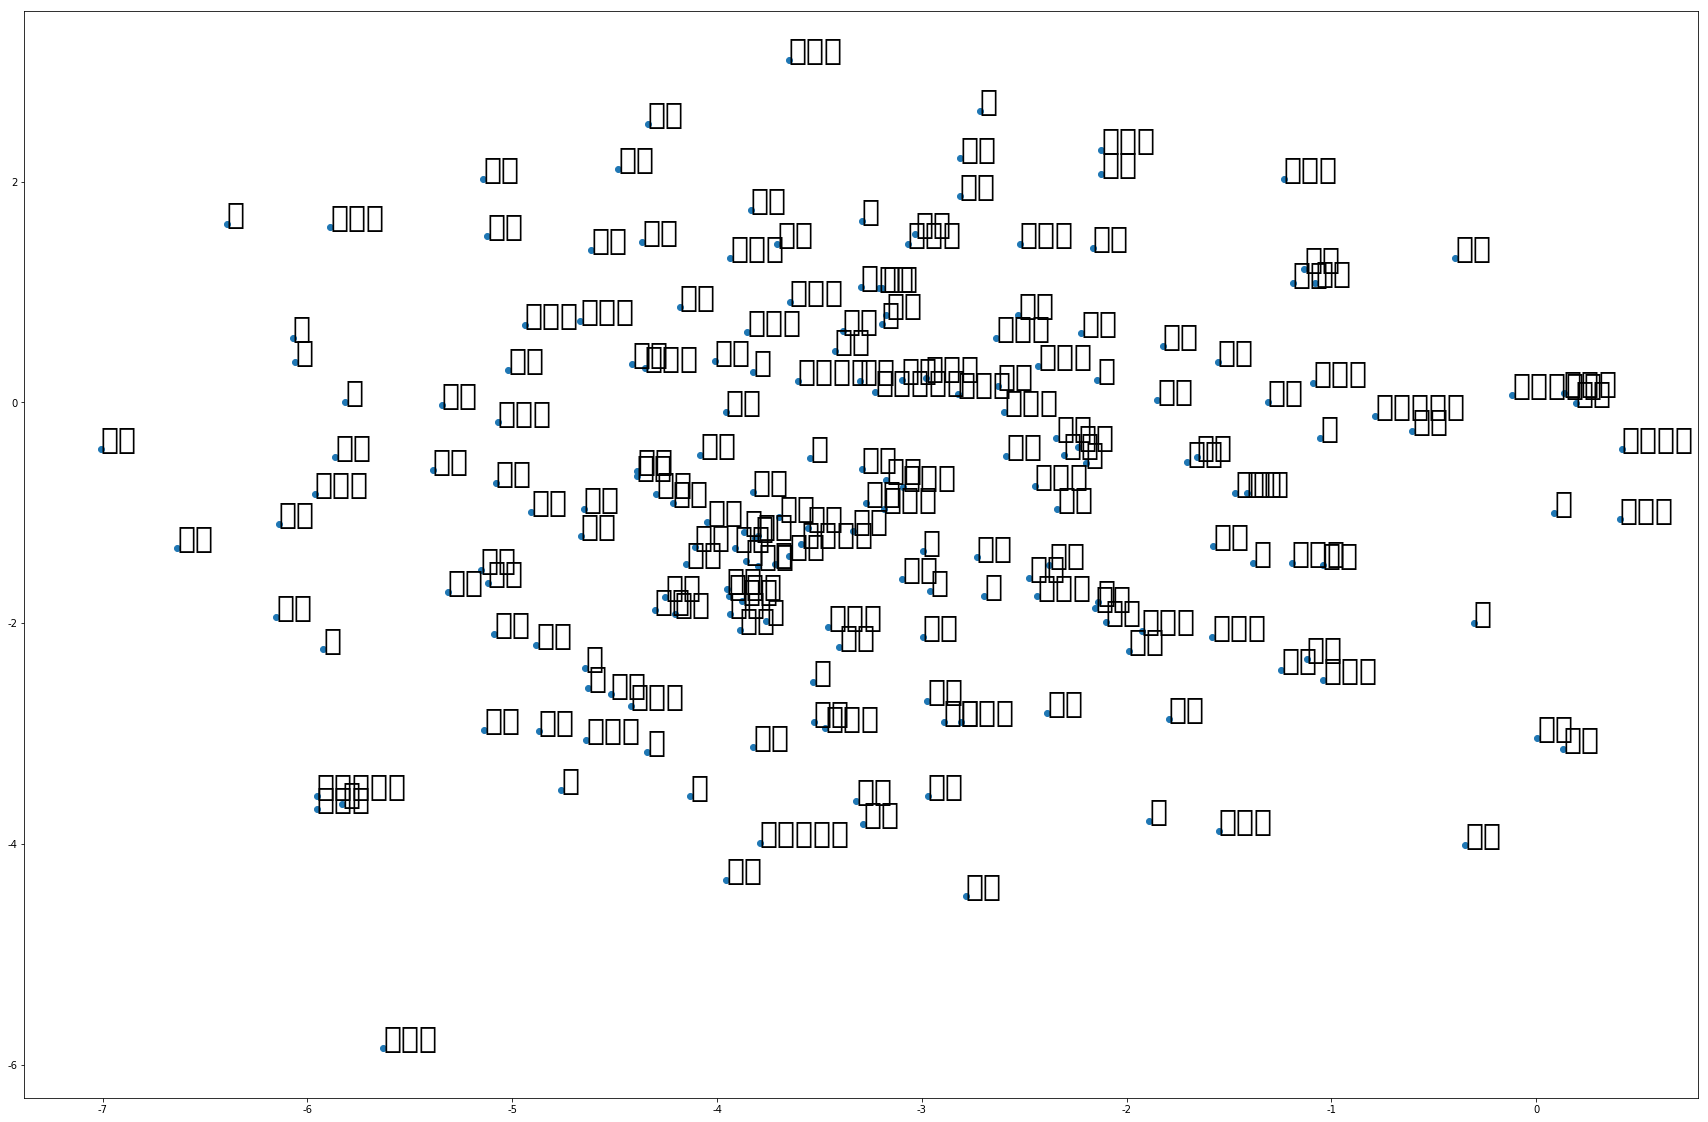

In [99]:
fig = plt.figure()
fig.set_size_inches(30, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word,pos,fontsize=30)
plt.show()